# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [15]:
# Import the appropriate libraries with aliases
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

# print to check
print("North Call Center Data:")
print(north_df.head())

print("South Call Center Data:")
print(south_df.head())


North Call Center Data:
   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0             

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [7]:
# EDA Question 1A solution below:
north_reps = north_df['Rep ID'].unique()
print(f"Number of reps in the North branch: {north_reps}")


Number of reps in the North branch: ['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']


#### EDA Question 1B:  How many reps are in the South branch?  

In [8]:
# EDA Question 1B solution Below:
south_reps = south_df['Rep ID'].unique()
print(f"Number of reps in the South branch: {south_reps}")


Number of reps in the South branch: ['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [13]:
# EDA Question 2A solution Below:
average_north = {
    'Average Busy Minutes': north_df['Busy Minutes'].mean(),
    'Average Not Ready Minutes': north_df['Not Ready Minutes'].mean(),
    'Average Incoming Wait Time': north_df['Incoming Wait Time'].mean(),
    'Average During Call Wait Time': north_df['During Call Wait Time'].mean()
}

print("Average times for the North branch:")
for metric, value in average_north.items():
    print("{}: {:.2f}".format(metric, value))


Average times for the North branch:
Average Busy Minutes: 9.99
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.05
Average During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [14]:
# EDA Question 2B solution Below:
average_south = {
    'Average Busy Minutes': south_df['Busy Minutes'].mean(),
    'Average Not Ready Minutes': south_df['Not Ready Minutes'].mean(),
    'Average Incoming Wait Time': south_df['Incoming Wait Time'].mean(),
    'Average During Call Wait Time': south_df['During Call Wait Time'].mean()
}

print("Average times for the South branch:")
for metric, value in average_south.items():
    print("{}: {:.2f}".format(metric, value))


Average times for the South branch:
Average Busy Minutes: 10.05
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.00
Average During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [80]:
# EDA Question 3 solution Below:
# groupby 'Time Block' & count number of calls for North branch
north_calls = north_df.groupby('Time Block')['Calls'].count().reset_index()
north_calls.columns = ['Time Block', 'Number of Calls (North)']

# groupby 'Time Block' & count number of calls for South branch
south_calls = south_df.groupby('Time Block')['Calls'].count().reset_index()
south_calls.columns = ['Time Block', 'Number of Calls (South)']

# merge the two results 
combined_calls = pd.merge(north_calls, south_calls, on='Time Block', how='outer').fillna(0)

# print
print("Number of calls taken for each time block (North and South):")
print(combined_calls)

# Combine both DataFrames
combined_df = pd.concat([north_df, south_df])

# Group by 'Time Block' and count the number of calls
calls_per_time_block = combined_df.groupby('Time Block')['Calls'].count().reset_index()

# Rename the column for clarity
calls_per_time_block.columns = ['Time Block', 'Number of Calls']

# Print the results
print("Number of calls taken for each time block (North and South combined):")
print(calls_per_time_block)



Number of calls taken for each time block (North and South):
  Time Block  Number of Calls (North)  Number of Calls (South)
0   10:00 AM                       43                       56
1   11:00 AM                       25                       31
2   12:00 PM                       45                       75
3    1:00 PM                       17                       23
4    2:00 PM                       35                       30
5    3:00 PM                       30                       43
6    4:00 PM                       28                       25
7    5:00 PM                       17                       26
8    9:00 AM                        5                        5
Number of calls taken for each time block (North and South combined):
  Time Block  Number of Calls
0   10:00 AM               99
1   11:00 AM               56
2   12:00 PM              120
3    1:00 PM               40
4    2:00 PM               65
5    3:00 PM               73
6    4:00 PM               53

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [81]:
# Question 1 solution below
# find missing values
north_missing_data = north_df.isna().sum()
south_missing_data = south_df.isna().sum()

# print missing values
print("North Call Center Missing Data:")
print(north_missing_data)

print("South Call Center Missing Data:")
print(south_missing_data)
# Results missing data: North Incoming Wait Time 163, South Incoming Wait Time 188

# calculate median for'Incoming Wait Time' column
north_median_wait_time = north_df['Incoming Wait Time'].median()
south_median_wait_time = south_df['Incoming Wait Time'].median()

# fill missing values with median
north_df['Incoming Wait Time'].fillna(north_median_wait_time, inplace=True)
south_df['Incoming Wait Time'].fillna(south_median_wait_time, inplace=True)

# check for missing values
north_missing_after_fill = north_df['Incoming Wait Time'].isna().sum()
south_missing_after_fill = south_df['Incoming Wait Time'].isna().sum()

north_missing_after_fill, south_missing_after_fill




North Call Center Missing Data:
Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64
South Call Center Missing Data:
Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64


C:\Users\jorda\AppData\Local\Temp\ipykernel_20816\2202024352.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  north_df['Incoming Wait Time'].fillna(north_median_wait_time, inplace=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_20816\2202024352.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

(np.int64(0), np.int64(0))

#### Record your answer below:

> Your Answer:
There are missing values in both the North and South datasets in the Incoming Wait Time column. Because Incoming Wait Time is essential to understanding customer experience, I decided to fill the missing values by using the median. I chose to use the median over the mean because it is less sensitive to extreme values. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [33]:
# Cleaning Question 2 solution below:
# check unique values in 'Sale' column for North
north_sale_unique_values = north_df['Sale'].unique()
print("Unique values in the 'Sale' column before cleaning:")
print(north_sale_unique_values)
# Results: ['NO' 'YES ' 'YES'] - two 'Yes', one just has an unnecessary space

# convert all values to uppercase and strip any spaces
north_df['Sale'] = north_df['Sale'].str.upper().str.strip()

# check 
north_sale_unique_values_cleaned = north_df['Sale'].unique()
print("Unique values in the 'Sale' column after cleaning:")
print(north_sale_unique_values_cleaned)

Unique values in the 'Sale' column before cleaning:
['NO' 'YES ' 'YES']
Unique values in the 'Sale' column after cleaning:
['NO' 'YES']


##### Record your answer by below:
> Your Answer: It is important we only have two options in the 'Sale' column. 'YES' and 'NO'. There was a third value 'YES ' with an unnecessary space after YES. I fixed this issue by converting all values to uppercase and stripped any spaces. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [35]:
# Cleaning Question 3 solution below:
# check for duplicates North
north_duplicates = north_df.duplicated().sum()
print(f"Number of duplicate rows in the North dataset: {north_duplicates}")

# check for duplicates South
south_duplicates = south_df.duplicated().sum()
print(f"Number of duplicate rows in the South dataset: {south_duplicates}")



Number of duplicate rows in the North dataset: 0
Number of duplicate rows in the South dataset: 0


##### Record your answer below:
> Your Answer: There are no duplicates

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [41]:
# Cleaning Question 4 solution below:
# print current columns
print('North dataset columns:', north_df.columns)
print('South dataset columns:', south_df.columns)

# remove 'unnamed' column, it just counts the records starting with 0, not necessary for our analysis
north_df_cleaned = north_df.drop(columns=['Unnamed: 0'], errors='ignore')
south_df_cleaned = south_df.drop(columns=['Unnamed: 0'], errors='ignore')

# print to check
print("North dataset columns after cleaning:", north_df_cleaned.columns)
print("South dataset columns after cleaning:", south_df_cleaned.columns)


North dataset columns: Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')
South dataset columns: Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')
North dataset columns after cleaning: Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')
South dataset columns after cleaning: Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoin

##### Record your answer below:
> Your Answer: I removed the Unnamed column as it just counts the number of enteries starting at 0. I don't find that necessary for this analysis.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [83]:
# Create dataframe for the entire company named df
df = pd.concat([north_df_cleaned, south_df_cleaned], ignore_index=True)

# print check
print('combined dataframe shape:', df.shape)
print('combined dataframe preview:')
print (df.head())


combined dataframe shape: (559, 14)
combined dataframe preview:
  Branch     Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
0  North        Complaint    9:00 AM             Incoming     B  Brent   NO   
1  North    Sales Support   11:00 AM             Incoming     A    Cam   NO   
2  North    Sales Support   11:00 AM             Incoming     B   Todd   NO   
3  North    Sales Support    4:00 PM             Incoming     B  Brent   NO   
4  North  Product Support   12:00 PM             Incoming     B  Brent   NO   

   Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
0          0          1             9                  2                 1.0   
1          0          0            11                  1                 1.0   
2          0          0             9                  3                 1.0   
3          0          0            11                  2                 1.0   
4          0          0             8                  2     

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [48]:
# Manipulation Question solution below:
# groupby rep id and sum
rep_grouped = df.groupby(['Rep ID', 'Branch']).sum()

# sort num of calls to find rep with highest num calls in each branch
rep_sorted = rep_grouped.sort_values(by='Calls', ascending=False)

# show top rep in each branch
top_reps_by_branch = rep_sorted.groupby('Branch').head(1)

# print results
print("Top representatives in each branch by number of calls:")
print(top_reps_by_branch[['Calls']])


Top representatives in each branch by number of calls:
               Calls
Rep ID Branch       
Brent  North      37
Eric   South      35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [51]:
# Manipulation Question 2 solution below:
# calulate abandoned calls
branch_abandonment = df.groupby('Branch').sum()[['Abandoned', 'Calls']]

# calulate abandonment rate for each branch
branch_abandonment['Abandonment Rate (%)'] = (branch_abandonment['Abandoned'] / branch_abandonment['Calls']) * 100

# calulate company wide
company_abandonment =df[['Abandoned', 'Calls']].sum()
company_abandonment_rate = (company_abandonment['Abandoned'] / company_abandonment['Calls']) * 100
branch_abandonment, company_abandonment_rate


(        Abandoned  Calls  Abandonment Rate (%)
 Branch                                        
 North           7    245              2.857143
 South           4    314              1.273885,
 np.float64(1.9677996422182469))

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
No

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [53]:
# Manipulation Question 3 solution below:
# filter incoming calls only
incoming_calls_df = df[df['Incoming or Outgoing'] == 'Incoming']

# filter calls answered within 2 seconds
calls_within_2_seconds = incoming_calls_df[incoming_calls_df['Incoming Wait Time'] <= 2]

# calculate total incoming calls per branch
total_incoming_calls_by_branch = incoming_calls_df.groupby('Branch')['Calls'].sum()

# calculate calls answered within 2 seconds per branch
calls_within_2_seconds_by_branch = calls_within_2_seconds.groupby('Branch')['Calls'].sum()

# calculate service level for each branch and also display the number of calls
north_service_level_percentage = (calls_within_2_seconds_by_branch['North'] / total_incoming_calls_by_branch['North']) * 100
south_service_level_percentage = (calls_within_2_seconds_by_branch['South'] / total_incoming_calls_by_branch['South']) * 100

# calculate company-wide service level
company_service_level_percentage = (calls_within_2_seconds_by_branch.sum() / total_incoming_calls_by_branch.sum()) * 100

# print results with number of calls
print(f"North Branch = {north_service_level_percentage:.2f}% and {calls_within_2_seconds_by_branch['North']} calls")
print(f"South Branch = {south_service_level_percentage:.2f}% and {calls_within_2_seconds_by_branch['South']} calls")
print(f"Company Wide = {company_service_level_percentage:.2f}% and {calls_within_2_seconds_by_branch.sum()} calls")



North Branch = 40.24% and 33 calls
South Branch = 38.10% and 48 calls
Company Wide = 38.94% and 81 calls


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.10% and 48
- Company Wide = 38.94% and 81

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [54]:
# Manipulation Question 4 solution below:
# incoming calls
incoming_calls_df = df[df['Incoming or Outgoing'] == 'Incoming']

# avg Incoming Wait Time for each branch
average_speed_of_answer_by_branch = incoming_calls_df.groupby('Branch')['Incoming Wait Time'].mean()

# company-wide avg Incoming Wait Time
company_average_speed_of_answer = incoming_calls_df['Incoming Wait Time'].mean()

# print
average_speed_of_answer_by_branch, company_average_speed_of_answer

(Branch
 North    3.04878
 South    3.00000
 Name: Incoming Wait Time, dtype: float64,
 np.float64(3.019230769230769))

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\jorda\AppData\Local\Temp\ipykernel_20816\186821059.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


<function matplotlib.pyplot.show(close=None, block=None)>

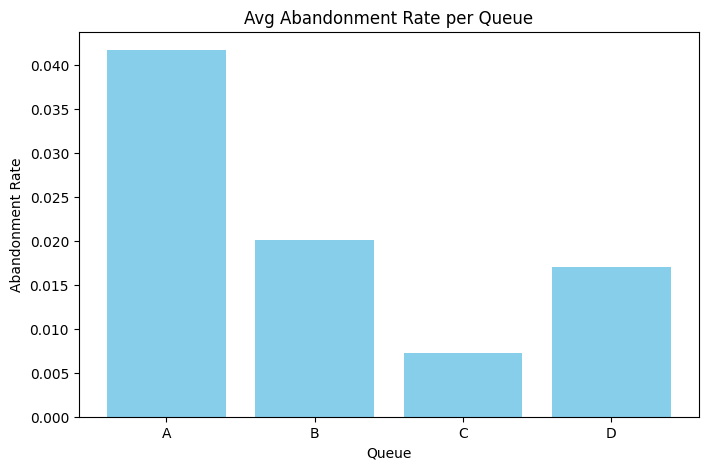

In [87]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
# 
queues = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())
# bar chart
plt.figure(figsize=(8,5))
plt.bar(queues, rates, color='skyblue')

# labels and title
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.title('Avg Abandonment Rate per Queue')

# 
plt.show



##### Record your answer below:

> Chart style you chose and why: I chose a bar chart because it is simple and effective when it comes to comparing categories with numerical values. (queues, abandonment rates). We can visually see which queue has the highest and lowest abaondoment rate.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

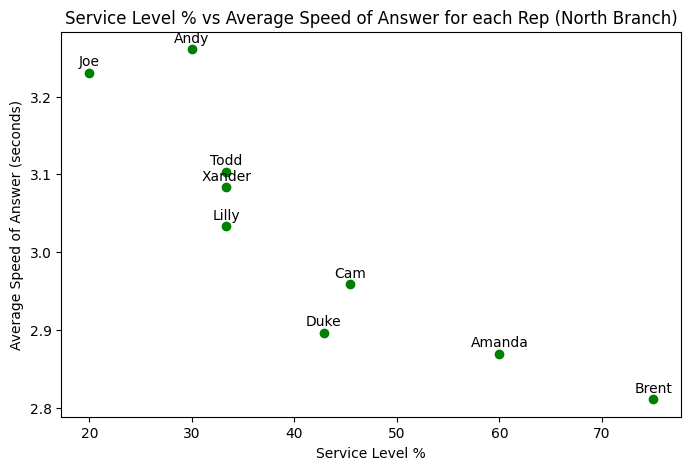

In [73]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north = df[df['Branch'] == 'North']
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Your Code Here:
# define the 'north' dataframe
north = df[df['Branch'] == 'North']

# merge service level w/ avg speed of answer
combined_stats = pd.merge(service_level, north_plt, on="Rep ID")

# scatter plot
x = combined_stats['Service Level %']
y = combined_stats['Incoming Wait Time']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='green')
plt.xlabel('Service Level %')
plt.ylabel('Average Speed of Answer (seconds)')
plt.title('Service Level % vs Average Speed of Answer for each Rep (North Branch)')

# label points w/ Rep ID
for i, rep in enumerate(combined_stats['Rep ID']):
    plt.annotate(rep, (x[i], y[i]), textcoords='offset points', xytext=(0, 5), ha='center')

plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose the scatterplot because I like the way the data is presented. You can visually see the correlation of average speed of calls and service level. Brent has the highest service level, and the fasted spped of answer. He has a higher service level because he provides more service than the other reps.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


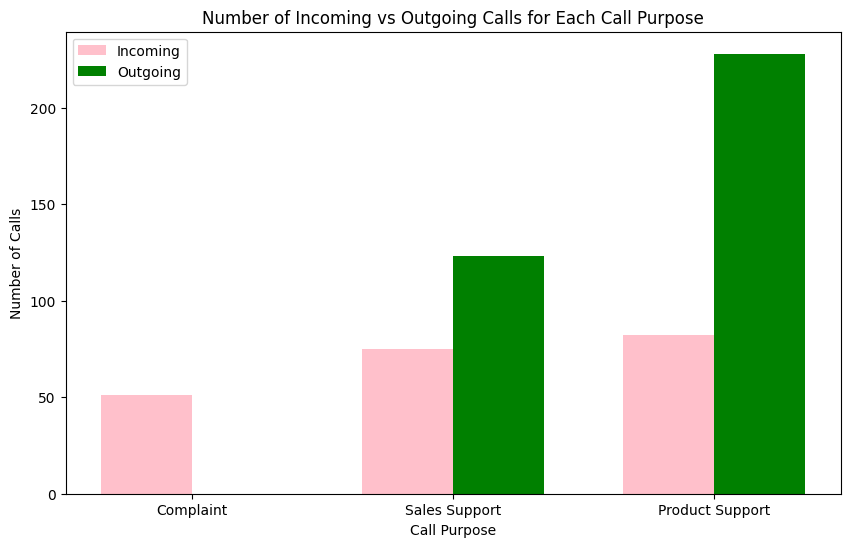

In [79]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
# Create visualization 3 here using a grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

# incoming and outgoing call data from the dictionaries
categories = ['Complaint', 'Sales Support', 'Product Support']
incoming_calls = [
    complaints.get('Incoming', 0),
    sales_support.get('Incoming', 0),
    product_support.get('Incoming', 0)
]
outgoing_calls = [
    complaints.get('Outgoing', 0),
    sales_support.get('Outgoing', 0),
    product_support.get('Outgoing', 0)
]

# grouped bar chart 
x = np.arange(len(categories))  # label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# incoming calls
rects1 = ax.bar(x - width/2, incoming_calls, width, label='Incoming', color='pink')

# outgoing calls
rects2 = ax.bar(x + width/2, outgoing_calls, width, label='Outgoing', color='green')

ax.set_xlabel('Call Purpose')
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Incoming vs Outgoing Calls for Each Call Purpose')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a grouped barchart so that we can directly see the differnce in incoming vs outgoing calls for each call purpose. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: I think the north branch is operating more efficiently. The highest. North branch reps answer 40.24% of their calls in under 2 seconds, the south branch trails at 38.10%. The north branch also has the rep with the highest service level and highest number of calls.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: Even though i feel as if the North branch is operating more efficiently, i feel they would most benefit from the extra help. They have 2 less people than the South branch and their abandoment rate is the worst compare the the south and the company-wide abandonment rates. Even if the south branch has more busy minutes, and the during wait time is longer than at the north branch, those calls all eventually reach a rep. Abandonment rate are the calls that never reach a rep. I think it's the most important thing to correct for the call center. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined